In [1]:
import os
import copy
from coffea import hist
from coffea import util
import numpy as np
import itertools
import pandas as pd
import uproot3

In [2]:
def printColorText(text, color): # both the input text and the color desired are input as strings
    whichcolor = {
                    'red':'\033[91m' + text,
                    'yellow':'\033[93m' + text,
                    'green':'\033[92m' + text,
                    'blue':'\033[96m' + text,
                    'indigo':'\033[94m' + text,
                    'violet':'\033[95m' + text,
                }
    print(whichcolor.get(color) + '\033[90m')
    # The added string on the end resets the default colored text to black #

# ---- Test the function ---- #
print('this sentence is black by default')
printColorText('this sentence should be violet', 'violet')
print('this sentence is defaulted to black after printColorText')

this sentence is black by default
this sentence should be violet
this sentence is defaulted to black after printColorText


In [3]:
# dir1 = 'CoffeaOutputs/UnweightedOutputs/'
# dir2 = 'CoffeaOutputs/WeightedModMassOutputs/'
dir1 = 'CoffeaOutputsForCombine/Coffea_FirstRun/'
dir2 = 'CoffeaOutputsForCombine/Coffea_SecondRun/'
btagDir = 'LooseBTag/'
yearDir = '2016/'
APVDir = 'noAPV/'

In [4]:
JetHT2016_unwgt_str = 'TTbarRes_0l_JetHT2016_Data'
TTbar_unwgt_str = 'TTbarRes_0l_UL16postVFP_TTbar'
RSGluon1000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon1000'
DM1000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM1000'

In [5]:
Unc = '_btagUnc_down_method2'
TopPt = '_TopReweight'

JetHT2016_wgt_str = JetHT2016_unwgt_str + '_weighted' + Unc
TTbar_wgt_str = TTbar_unwgt_str + '_weighted' + Unc + TopPt
RSGluon1000_wgt_str = RSGluon1000_unwgt_str + '_weighted' + Unc
DM1000_wgt_str = DM1000_unwgt_str + '_weighted' + Unc

In [6]:
JetHT2016_unweighted = util.load(dir1 + 'JetHT/' + btagDir + yearDir + JetHT2016_unwgt_str + '.coffea')
TTbar_unweighted = util.load(dir1 + 'TT/' + btagDir + yearDir + APVDir + TTbar_unwgt_str + '.coffea')
RSGluon1000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1000_unwgt_str + '.coffea')
DM1000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1000_unwgt_str + '.coffea')

JetHT2016_weighted = util.load(dir2 + 'JetHT/' + btagDir + yearDir + JetHT2016_wgt_str + '.coffea')
TTbar_weighted = util.load(dir2 + 'TT/' + btagDir + yearDir + APVDir + TTbar_wgt_str + '.coffea')
RSGluon1000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1000_wgt_str + '.coffea')
DM1000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1000_wgt_str + '.coffea')

In [7]:
outputs_unweighted =     {'JetHT 2016': JetHT2016_unweighted,
#                           'JetHT 2017': JetHT2017_unweighted,
#                           'JetHT 2018': JetHT2018_unweighted,
#                           'JetHT All': JetHT_unweighted
                          'TTbar': TTbar_unweighted,
                          'RSGluon1000': RSGluon1000_unweighted,
                          'DM1000': DM1000_unweighted
                         }

outputs_weighted  =      {'JetHT 2016': JetHT2016_weighted,
#                           'JetHT 2017': JetHT2017_ModMass_weighted,
#                           'JetHT 2018': JetHT2018_ModMass_weighted,
#                           'JetHT All': JetHT_ModMass_weighted
                          'TTbar': TTbar_weighted,
                          'RSGluon1000': RSGluon1000_weighted,
                          'DM1000': DM1000_weighted
                         }

# Cutflow

In [8]:
for name,output in outputs_unweighted.items(): 
    print("-------Unweighted " + name + "--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %12d' % (i,j) )

-------Unweighted JetHT 2016--------
          all events :     24670916
              HT Cut :      3481006
        Loose Jet ID :      3452038
            pT,y Cut :      2745709
         two FatJets :      1573339
         >= oneTTbar :      1573339
            dPhi Cut :       784599
        Good Subjets :       764613
                sumw :       764613
               sumw2 :       764613
          AT&Pt0bcen :          120
          AT&Pt0bfwd :           78
          AT&Pt1bcen :          776
          AT&Pt1bfwd :          645
          AT&Pt2bcen :         1374
          AT&Pt2bfwd :         1458
             at0bcen :         4419
             at0bfwd :         3685
             at1bcen :        22450
             at1bfwd :        22418
             at2bcen :        28408
             at2bfwd :        30652
           pret0bcen :         1063
           pret0bfwd :          839
           pret1bcen :         6021
           pret1bfwd :         5946
           pret2bcen :     

In [9]:
for name,output in outputs_weighted.items(): 
    print("-------Weighted " + name + "--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %12d' % (i,j) )

-------Weighted JetHT 2016--------
          all events :     24670916
              HT Cut :      3481006
        Loose Jet ID :      3452038
            pT,y Cut :      2745709
         two FatJets :      1573339
         >= oneTTbar :      1573339
            dPhi Cut :       784599
        Good Subjets :       764613
                sumw :       764613
               sumw2 :       764613
          AT&Pt0bcen :          120
          AT&Pt0bfwd :           78
          AT&Pt1bcen :          776
          AT&Pt1bfwd :          645
          AT&Pt2bcen :         1374
          AT&Pt2bfwd :         1458
             at0bcen :         4419
             at0bfwd :         3685
             at1bcen :        22450
             at1bfwd :        22418
             at2bcen :        28408
             at2bfwd :        30652
           pret0bcen :         1063
           pret0bfwd :          839
           pret1bcen :         6021
           pret1bfwd :         5946
           pret2bcen :       

In [10]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [11]:
def DoesDirectoryExist(mypath): #extra precaution (Probably overkill...)
    '''Checks to see if Directory exists before running mkdir_p'''
    import os.path
    from os import path
    
    if path.exists(mypath):
        pass
    else:
        mkdir_p(mypath)

In [12]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
ttagcats = ["at", "0t", "1t", "2t"]
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']

list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
list_of_bcats = [ b+y for b,y in itertools.product( btagcats, ycats) ]

# ---- List the Histograms Here ---- #
list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep')

In [13]:
maindirectory = os.getcwd() 
print(maindirectory)

/home/cms-jovyan/TTbarAllHadUproot


In [14]:
stack_ttbar_opts = {'alpha': 0.8, 'edgecolor':(0,0,0,0.3), 'color': 'red'}
stack_background_opts = {'alpha': 0.8, 'edgecolor':(0,0,0,0.3), 'color': 'yellow'}
stack_error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'None', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
line_rsg1000_opts = {'color': 'purple'}
line_dm1000_opts = {'linestyle': '--', 'color': 'black'}
data_err_opts = {'linestyle': 'none', 'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1}

# Luminosities, Cross Sections & Scale Factors for MC

In [15]:
Lum2016 = 35920. # pb^-1 from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable
Lum2017 = 41530.
Lum2018 = 59740.
Lum     = 137190.

ttbar_BR = 0.4544 #PDG 2019
ttbar_xs = 831.76  #pb  Monte Carlo already includes xs in event weight (if not dividing by sumw2)!!

ttbar2016_sf = ttbar_xs*Lum2016*ttbar_BR/TTbar_unweighted['cutflow']['sumw2'] #ttbar_xs*ttbar_BR*Lum2016/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2016/142155064.
# ttbar2017_sf = ttbar_xs*Lum2017/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2017/142155064.
# ttbar2018_sf = ttbar_xs*Lum2018/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2018/142155064.

ttbar2016_sf_wgt = ttbar_xs*Lum2016*ttbar_BR/TTbar_weighted['cutflow']['sumw2'] #ttbar_xs*ttbar_BR*Lum2016/TTbar_weighted['cutflow']['all events']  #ttbar_xs*Lum2016/142155064.
# ttbar2017_sf_wgt = ttbar_xs*Lum2017/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2017/142155064.
# ttbar2018_sf_wgt = ttbar_xs*Lum2018/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2018/142155064.

toptag_kf = 0.70 # k-factor from https://github.com/cmsb2g/B2GTTbar/blob/master/test/MakeMistag_SubtractAndDivideAntiTag_B2G2016.cc#L472

# -- Should be the same given the same number of events in both wgt and unwgt outputs -- #
print('ttbar 2016 scale factor          = ', ttbar2016_sf)
print('ttbar 2016 weighted scale factor = ', ttbar2016_sf_wgt)

# ---- https://cms-gen-dev.cern.ch/xsdb/?columns=67108863&currentPage=0&pageSize=0&searchQuery=process_name%3DRSGluon ---- #
RSGluon1000_xs = 20.95
RSGluon1500_xs = 3.679
RSGluon2000_xs = 0.9429
RSGluon2500_xs = 0.3039
RSGluon3000_xs = 0.1163
RSGluon3500_xs = 0.05132
RSGluon4000_xs = 0.02545
RSGluon4500_xs = 0.01422
RSGluon5000_xs = 0.008634

DM1000_xs = 2.222

RSGluon1000_2016_sf_wgt = Lum2016/RSGluon1000_weighted['cutflow']['all events'] # This normalization is more realistic (should look into this more when I have freetime)
DM1000_2016_sf_wgt = Lum2016/DM1000_weighted['cutflow']['all events']

ttbar 2016 scale factor          =  2.1807628447015052e-05
ttbar 2016 weighted scale factor =  2.1807628447015052e-05


In [16]:
Nevts2016 = 625502676 #625516390. # from dasgoclient
Nevts2016_sf = Nevts2016/JetHT2016_unweighted['cutflow']['all events']
Nevts2016_sf_wgt = Nevts2016/JetHT2016_weighted['cutflow']['all events']

# Nevts2017 = 410461585.
# Nevts2017_sf = Nevts2017/JetHT2017_unweighted['cutflow']['all events']

# Nevts2018 = 676328827.
# Nevts2018_sf = Nevts2018/JetHT2018_unweighted['cutflow']['all events']

# NevtsAll = Nevts2016+Nevts2017+Nevts2018
# Nevts_sf = NevtsAll/JetHT_unweighted['cutflow']['all events']

print(Nevts2016_sf)
print(Nevts2016_sf_wgt)

25.353848880195613
25.353848880195613


In [17]:
# ---- Optional to rescale x-axis of mistag rates ---- #
def forward(x):
    return x**(1/2)

def inverse(x):
    return x**2

# Closure Test
## mistag region x mistag rate = testing region
## $|\vec{p}|_{\mathit{all\ probe\ jets}}\ \times\ \frac{|\vec{p}|_{\mathit{t-tagged\ probe\ jets}}}{|\vec{p}|_{\mathit{all\ probe\ jets}}}\ =\ |\vec{p}|_{\mathit{t-tagged\ probe\ jets}}$
## JetHT data in mistag region 'at' (Anti-tag and probe region) that is weighted with mistag rate should give back JetHT unweighted data in 'Probet' region (Anti-tag and t-tagged probe region)
## NOTE: This test is not precise unless both weighted and unweighted JetHT samples have the same number of events in cutflow (check 'all events' for both)

Mean Mistag Rate (MMR) =  0.0
All JetHT2016 unweighted events =  24670916
All JetHT2016 weighted events =  24670916

Number of Unweighted "at" Data (Cutflow) =  4419
Number of Weighted "at" Data (Cutflow) =    4419
Number of Unweighted "Probet" Data (Cutflow) =  120

               p  M(p)  unwgt at0bcen  wgt at0bcen  Probet0bcen
0     [400, 500)   0.0   19091.448207   785.969315   785.969315
1     [500, 600)   0.0   30095.018621   963.446257   963.446257
2     [600, 800)   0.0   34253.049837   862.030862   862.030862
3    [800, 1000)   0.0   14477.047711   278.892338   278.892338
4   [1000, 1500)   0.0   11003.570414   101.415396   101.415396
5   [1500, 2000)   0.0    2535.384888    50.707698    50.707698
6   [2000, 3000)   0.0     507.076978     0.000000     0.000000
7   [3000, 7000)   0.0      76.061547     0.000000     0.000000
8  [7000, 10000)   0.0       0.000000     0.000000     0.000000
Mean Mistag Rate (MMR) =  0.0
All JetHT2016 unweighted events =  24670916
All JetHT2016 weig

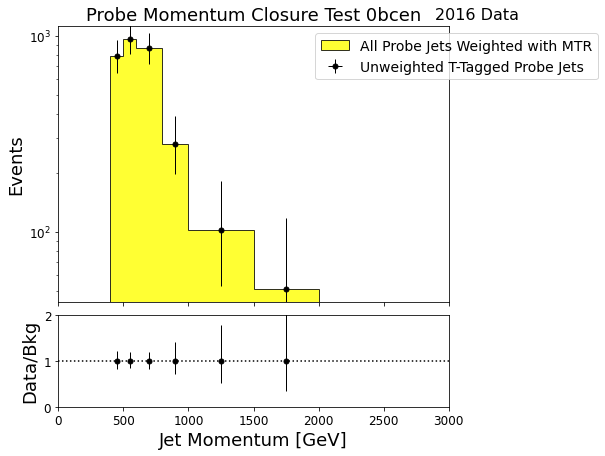

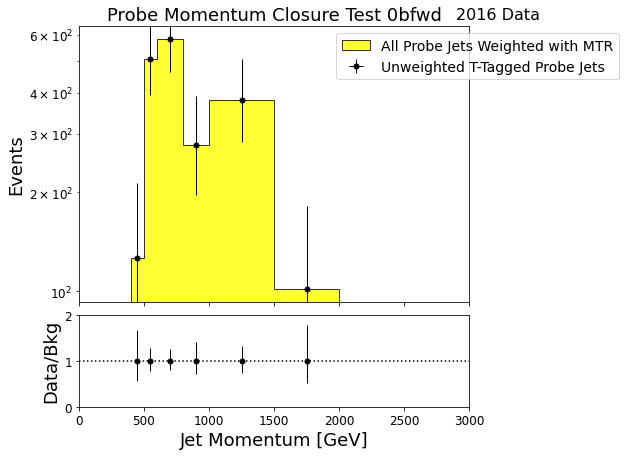

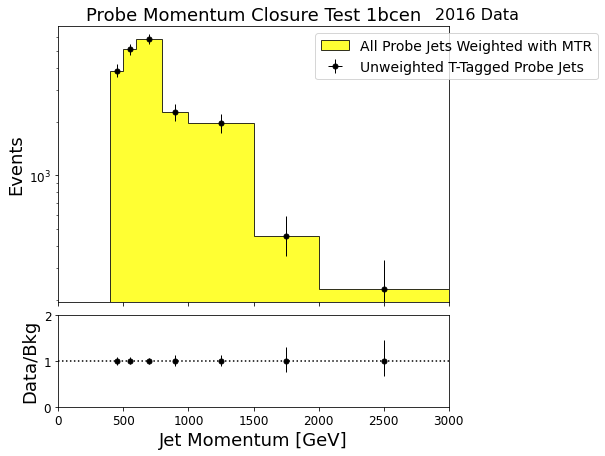

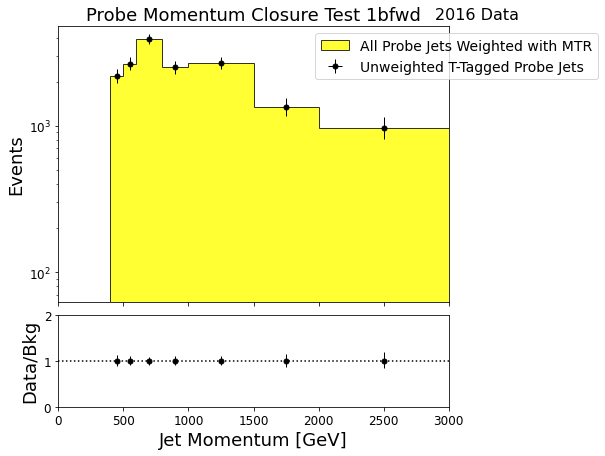

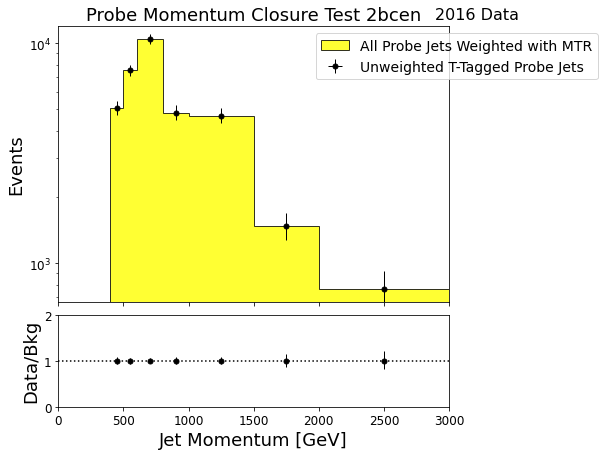

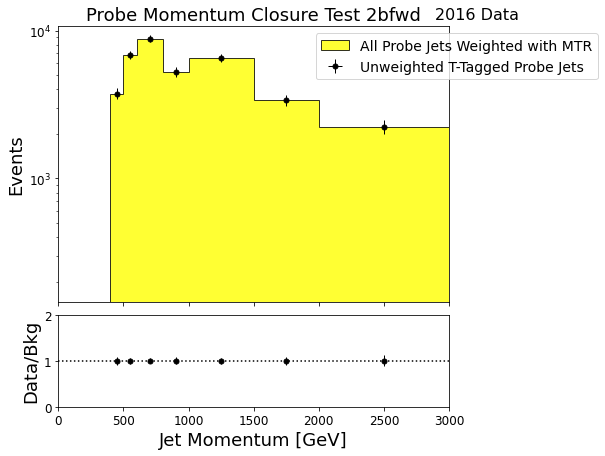

In [18]:
""" ---------- Comparing Background Estimate to unweighted Data ---------- """
SaveDirectory = maindirectory + '/' + 'ClosureTests' + '/' # split histograms into subdirectories
DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
for b_y in list_of_bcats:
    #---- Histogram Window Config. ----# 
    plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(7,7),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.07)
    #b_y = '0bcen' # b-tag category and rapidity window

    legend_labels = {'labels':['', 'All Probe Jets Weighted with MTR', 'T-Tagged Probe Jets'],
                             'loc': 'upper right',
                             'fontsize': 'x-small'}

    #---- Useful Information (Debug Purposes Only)----# 
    lut_file = maindirectory + '/LookupTables/mistag_JetHT2016_Data_at' + b_y + '.csv'
    df = pd.read_csv(lut_file)
    p_vals = df['p'] # Momentum (GeV)
    mtr = df['M(p)'].values # Mistag Rate
    MMR = mtr.sum()/mtr.size
    print('Mean Mistag Rate (MMR) = ', MMR)

    #---- Check if these two cutflows are the same ----#
    all_evts_unwgt = JetHT2016_unweighted['cutflow']['all events']
    all_evts_wgt = JetHT2016_weighted['cutflow']['all events']
    nevts = JetHT2016_unweighted['cutflow']['at'+b_y] # Anti-tag jet
    bkg_nevts = JetHT2016_weighted['cutflow']['at'+b_y] # (Anti-tag jets) x mtr
    exp_nevts = JetHT2016_unweighted['cutflow']['AT&Pt'+b_y] # Anti-tag and t-tagged Probe pairs
    
    print('All JetHT2016 unweighted events = ', all_evts_unwgt)
    print('All JetHT2016 weighted events = ', all_evts_wgt)
    if all_evts_unwgt != all_evts_wgt:
        printColorText('\n*NOTE* This test is not accurate', 'red')
    print()
    print('Number of Unweighted "at" Data (Cutflow) = ', nevts)
    print('Number of Weighted "at" Data (Cutflow) =   ', bkg_nevts)
    print('Number of Unweighted "Probet" Data (Cutflow) = ', exp_nevts)
    print()

    #---- Define Histogram categories of interest which should be equal ----# 
    hist_wgt_anacat = 'at' + b_y # category of interest for the weighted data (all weighted probe jets)
    hist_unwgt_anacat = 'AT&Pt' + b_y # category of interest for the un-weighted data (unweighted t-tagged probe jets)
    #---- Just for Comparison... ---#
    hist_unwgt_pretag_anacat = 'at' + b_y # (all unweighted probe jets)

    #---- Given pairs of jets where one jet is anti-tagged, show the momentum of the probe jets ----#
    hist_wgt = JetHT2016_weighted['probep'].integrate('anacat', hist_wgt_anacat).integrate('dataset', JetHT2016_unwgt_str[12:])
    hist_unwgt = JetHT2016_unweighted['probep'].integrate('anacat', hist_unwgt_anacat).integrate('dataset', JetHT2016_unwgt_str[12:])
    hist_unwgt_pretag = JetHT2016_unweighted['probep'].integrate('anacat', hist_unwgt_pretag_anacat).integrate('dataset', JetHT2016_unwgt_str[12:])

    # ---- Data Scaling ---- #
    hist_wgt.scale(Nevts2016_sf_wgt)
    hist_unwgt.scale(Nevts2016_sf) 
    hist_unwgt_pretag.scale(Nevts2016_sf)
    
    hist.plot1d(hist_wgt, ax=ax, clear=True,
                        fill_opts=stack_background_opts, error_opts=stack_error_opts) # all probe jets weighted with mistag rate (including tt contam. subtraction)
    hist.plot1d(hist_unwgt, ax=ax, clear=False,
                        error_opts=data_err_opts,
                        legend_opts=legend_labels) # all unweighted, t-tagged probe jets

    d = {'p': p_vals, 'M(p)': mtr, 
         'unwgt at'+b_y: hist_unwgt_pretag.values()[()], 
         'wgt at'+b_y: hist_wgt.values()[()], 
         'Probet'+b_y: hist_unwgt.values()[()]}
    df1 = pd.DataFrame(data=d)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df1)

    ax.set_yscale('log')
    ax.autoscale('y')
    ax.autoscale('x')#, tight=True) # doesn't look like its working...
    ax.set_ylabel('Events')
    ax.set_xlabel(None)
    ax.set_title('Probe Momentum Closure Test ' + b_y)
    leg = ax.legend(labels=[r'All Probe Jets Weighted with MTR', r'Unweighted T-Tagged Probe Jets'], bbox_to_anchor=(1.4, 1.), loc='upper right')

    #---- Plot Ratio ----#
    hist.plotratio(num = hist_unwgt, denom = hist_wgt, ax = rax,
                   error_opts=data_err_opts,
                   unc = 'num')
    rax.set_ylabel('Data/Bkg')
    rax.axhline(y=1, color='k', linestyle=':')
    rax.set_ylim(0,2)
    rax.set_xlim(0,3000)

    #---- Labeling ----#
    lumi = plt.text(1.18, 1.07, "2016 Data", #"?? fb$^{-1}$",
            fontsize=16,
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes
           )

    #filename = 'ClosureTest_2016_' + b_y + '.png'
    #plt.savefig(SaveDirectory+filename, bbox_inches="tight")
    #print('\n' + filename + ' saved')
    #print('\n ********************************************************')
    #print()

## Analysis Plots with Data Driven Background Estimate

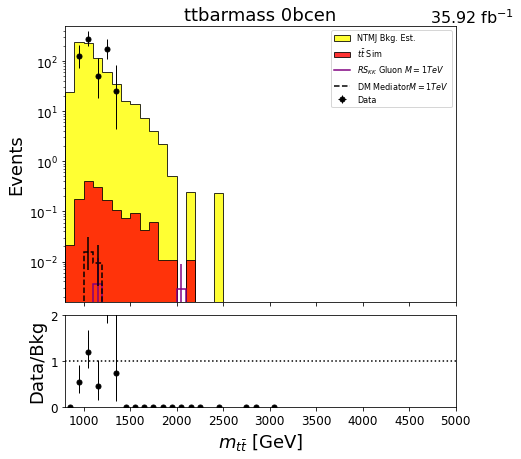

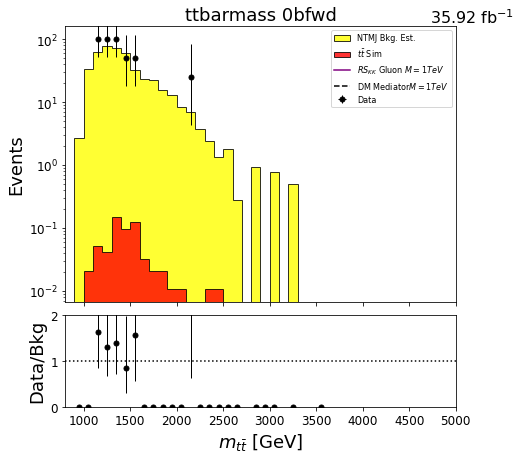

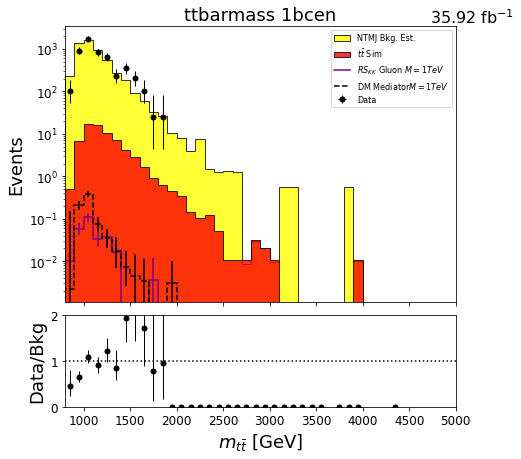

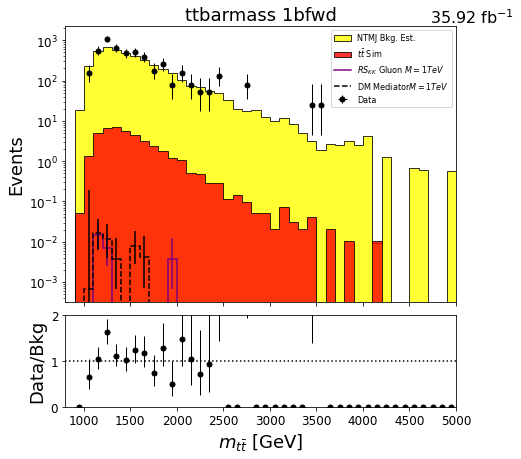

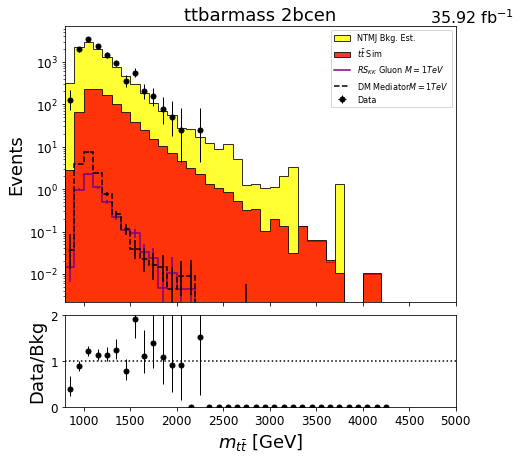

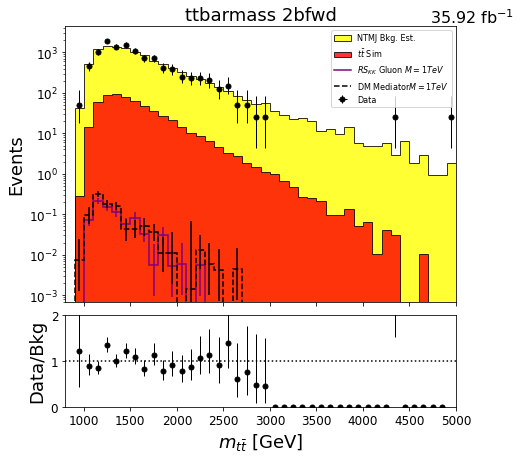

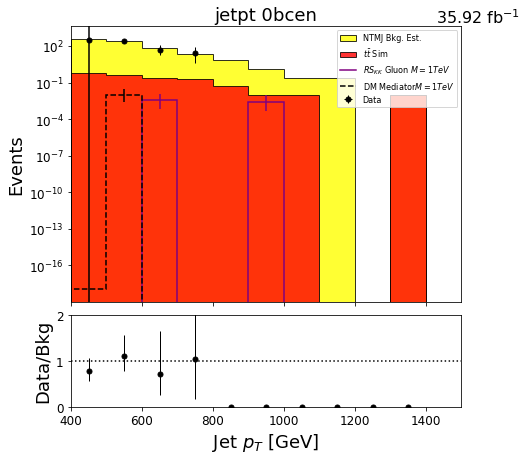

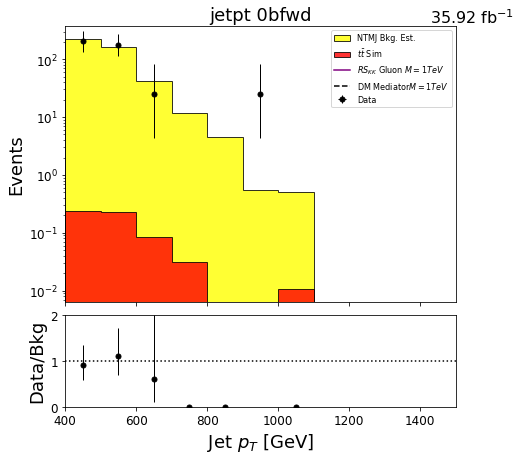

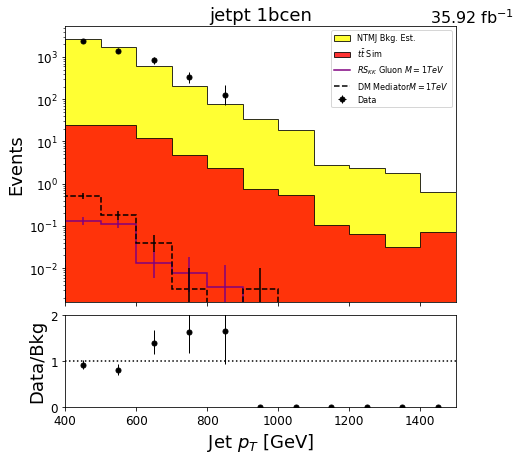

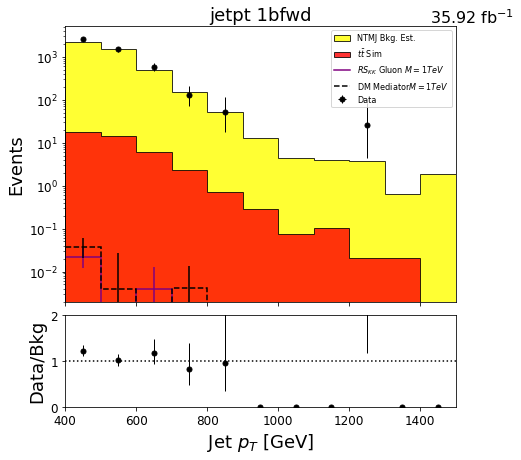

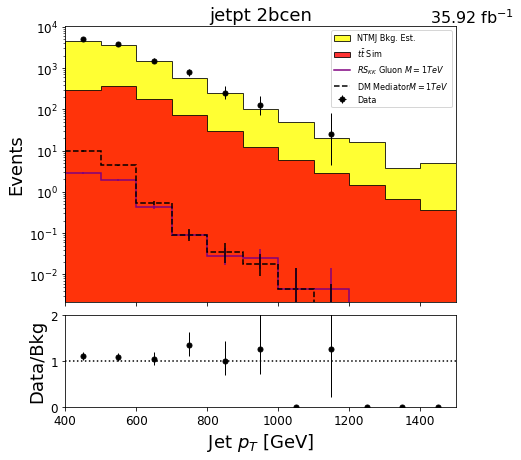

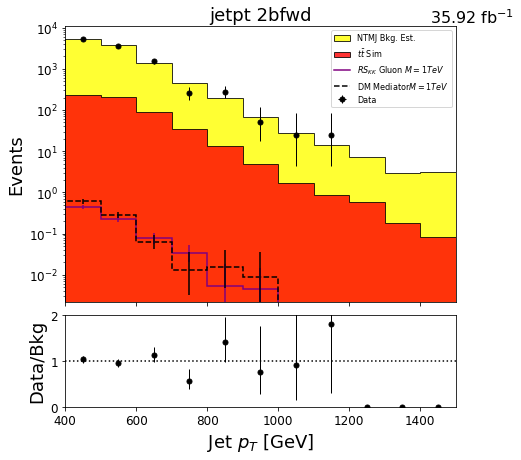

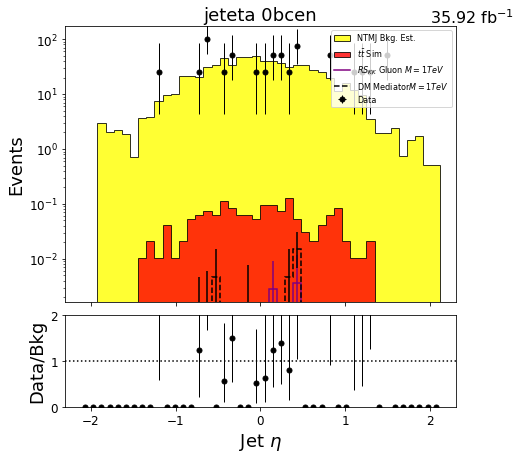

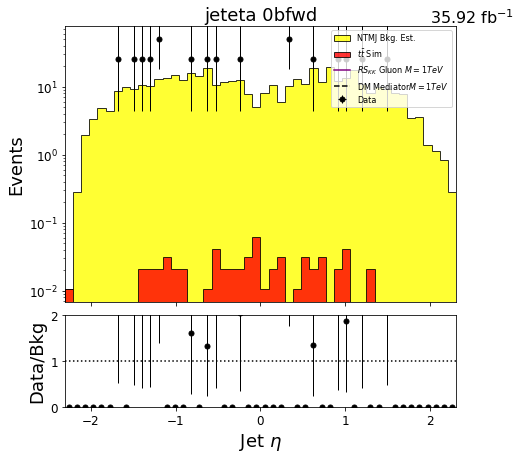

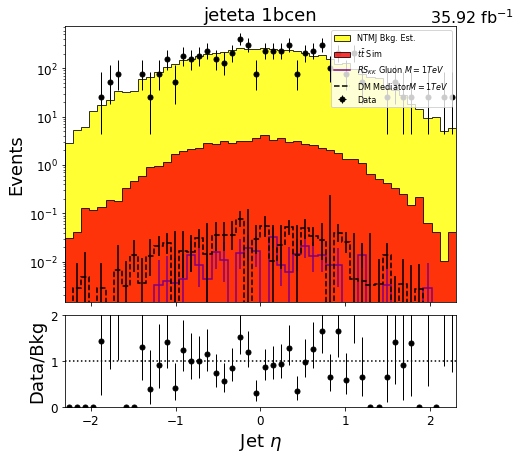

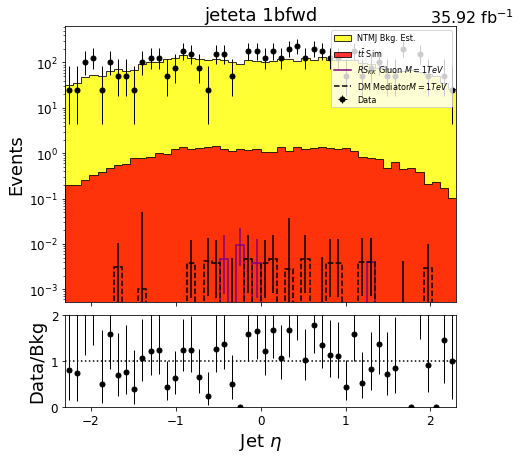

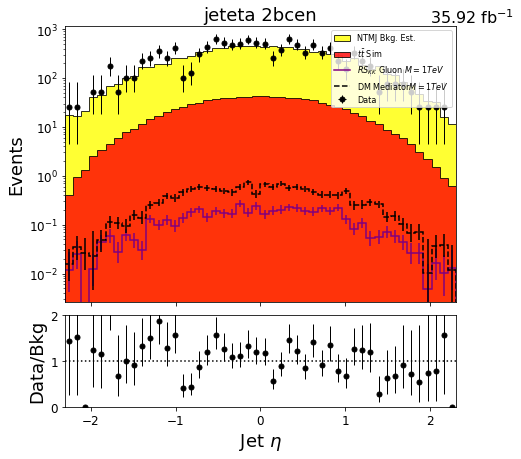

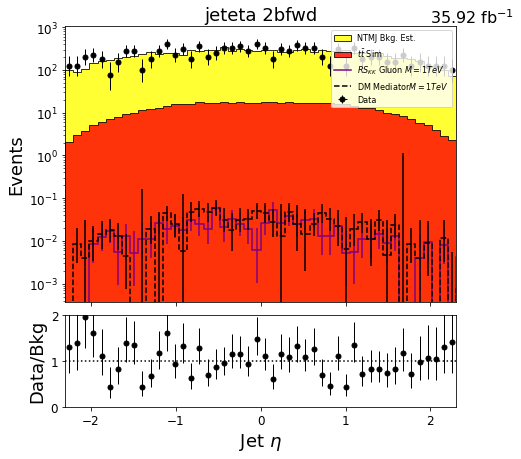

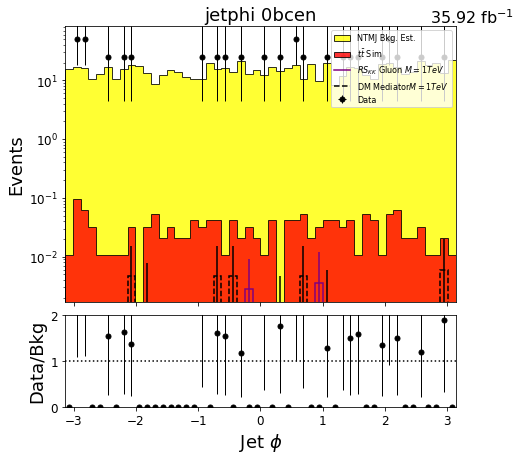

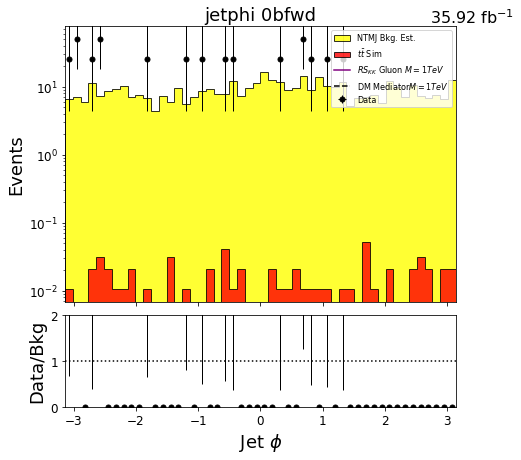

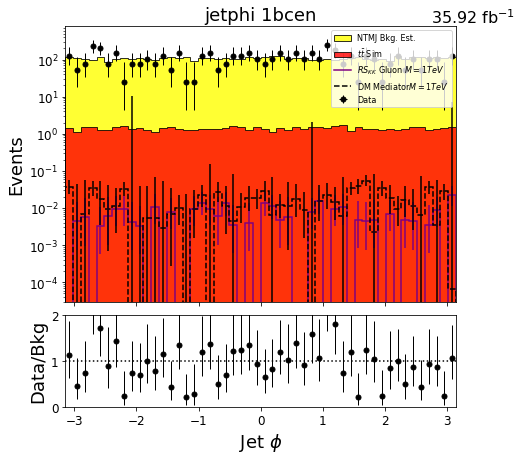

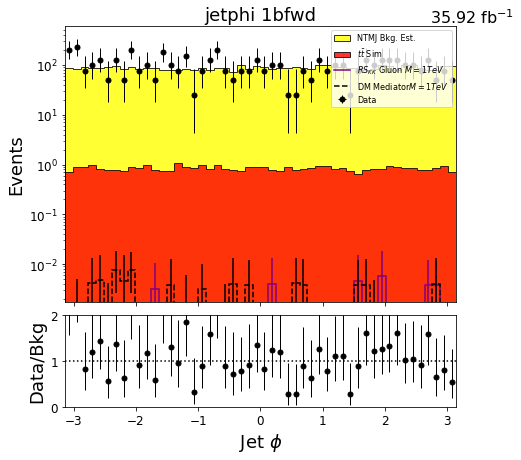

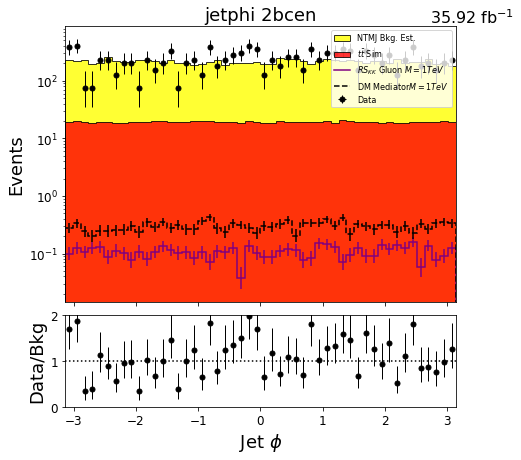

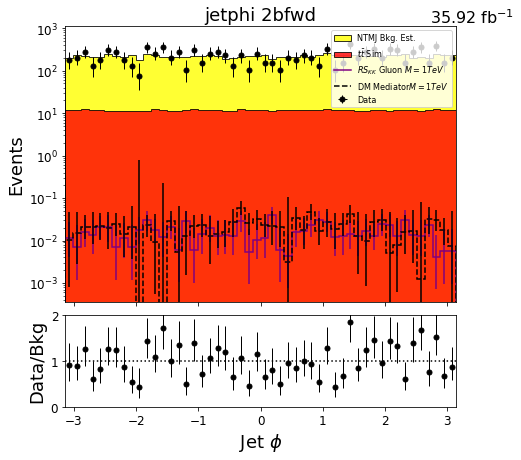

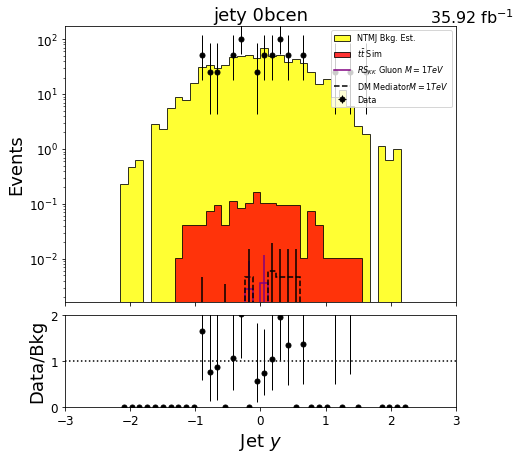

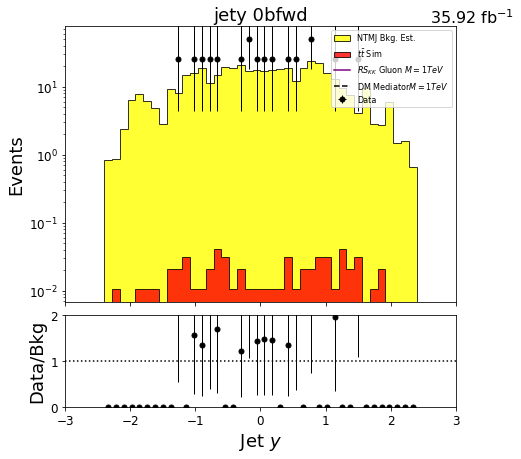

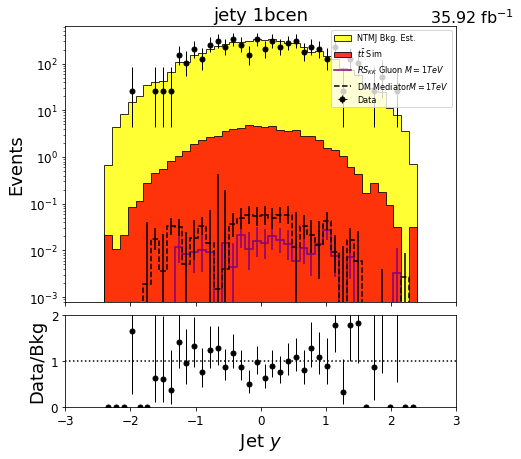

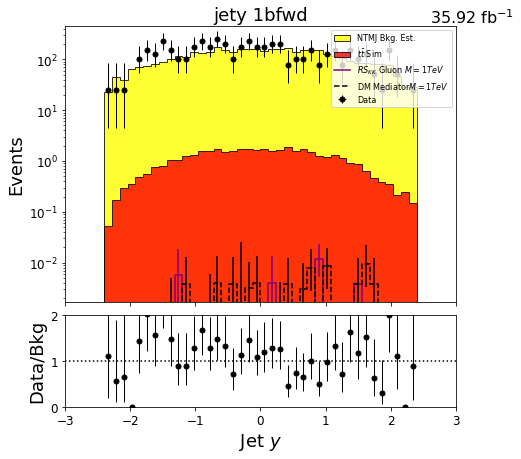

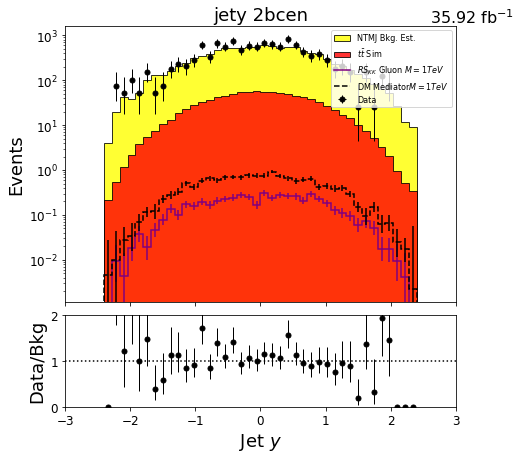

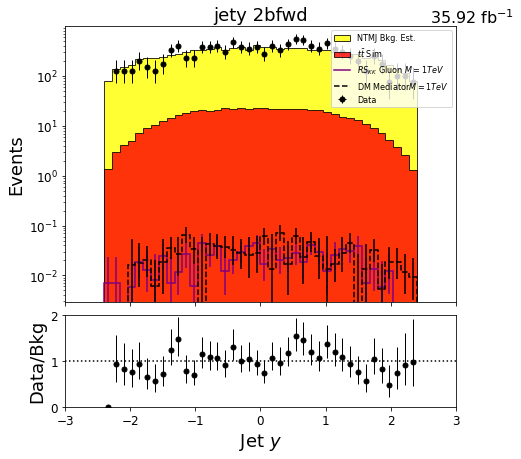

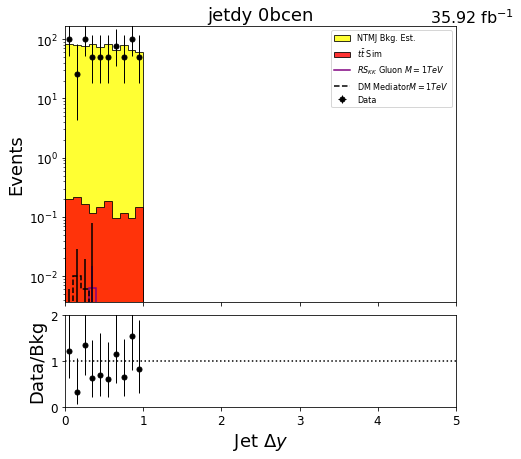

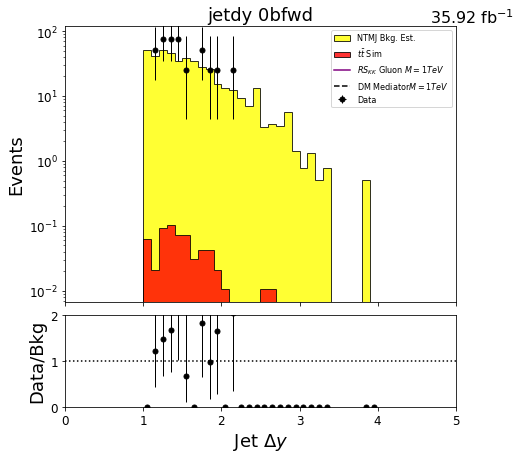

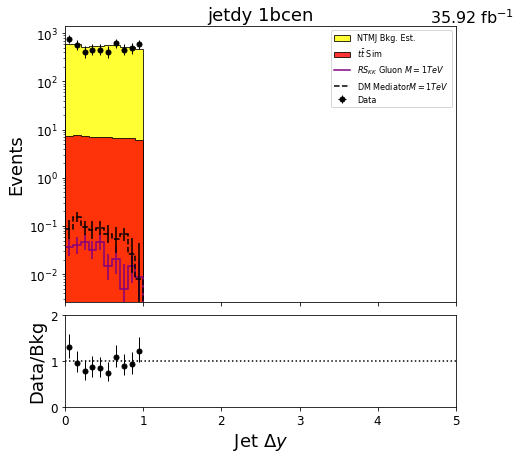

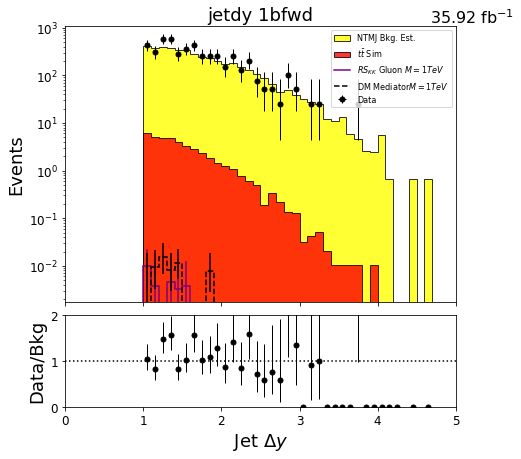

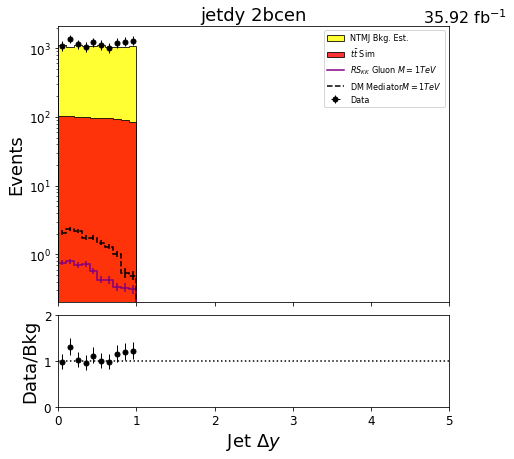

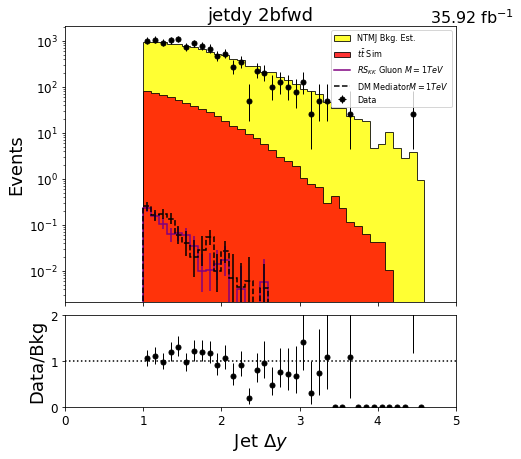

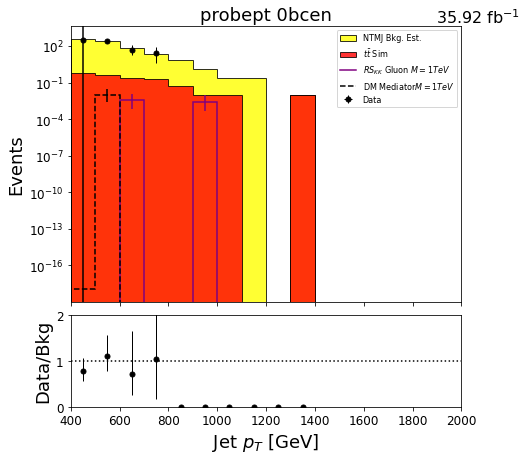

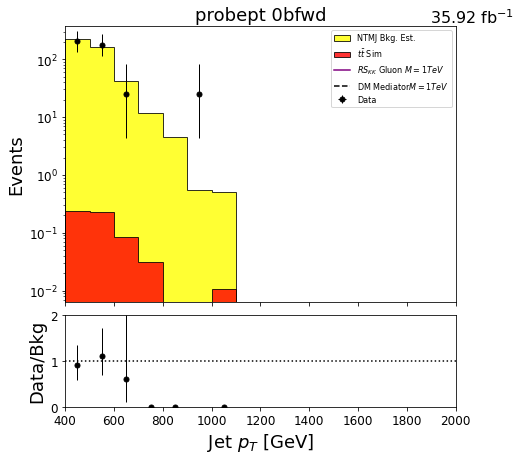

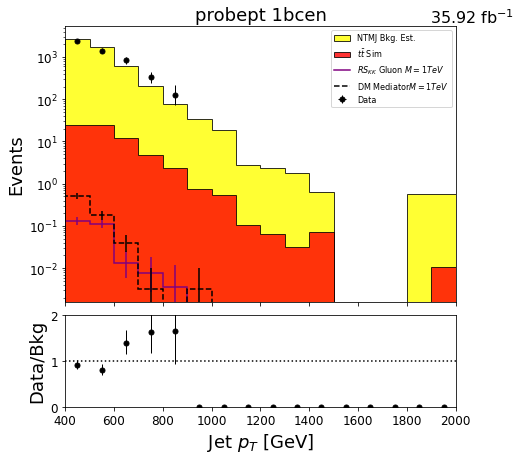

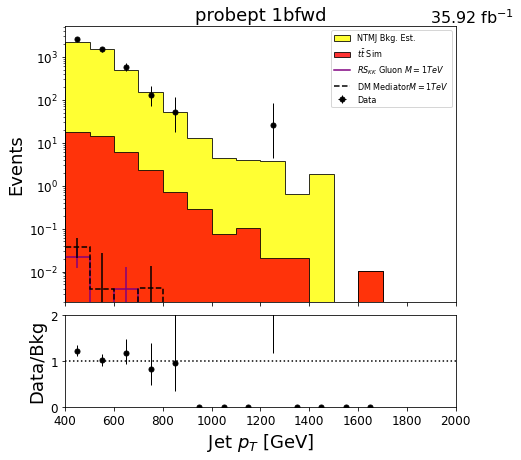

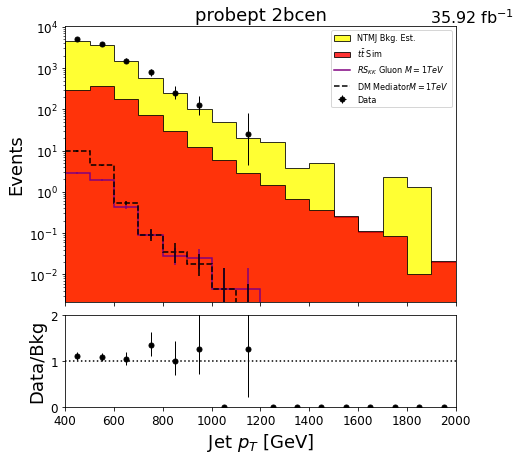

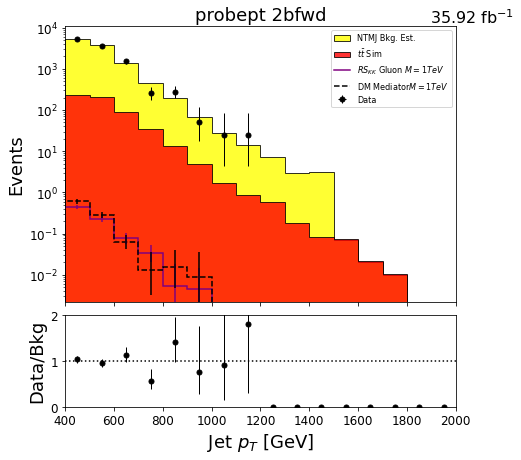

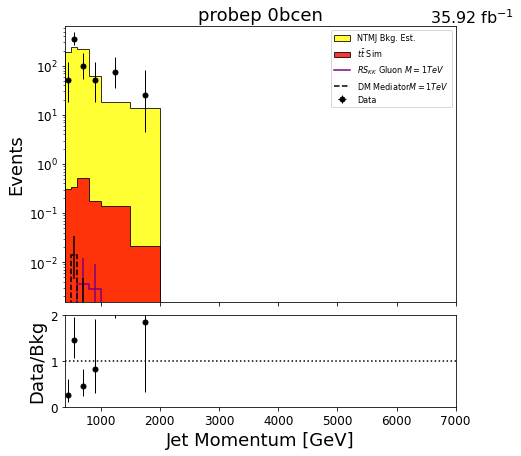

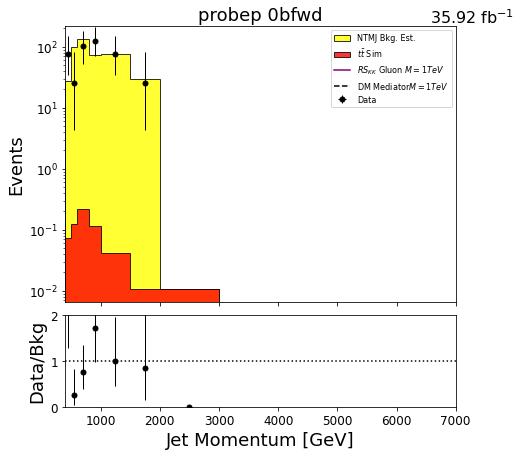

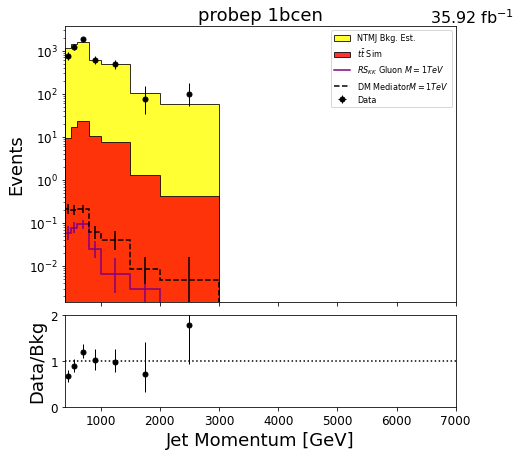

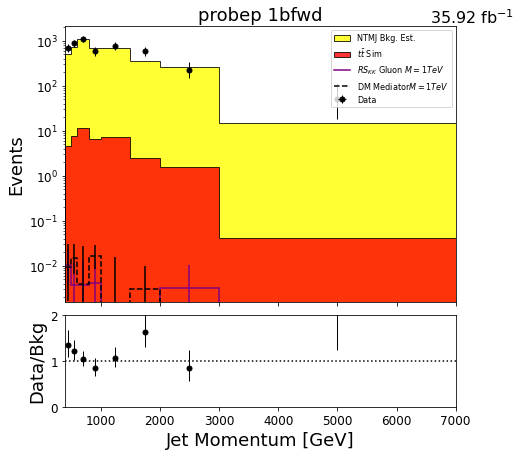

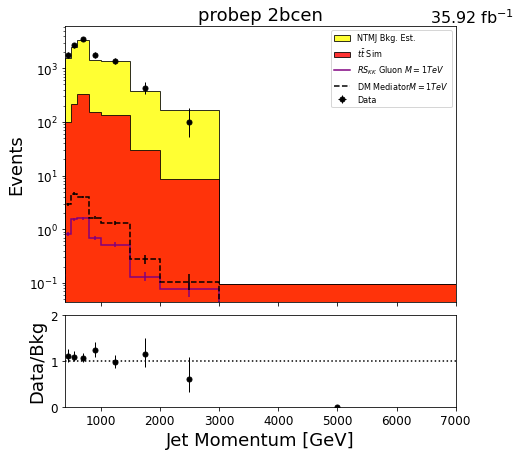

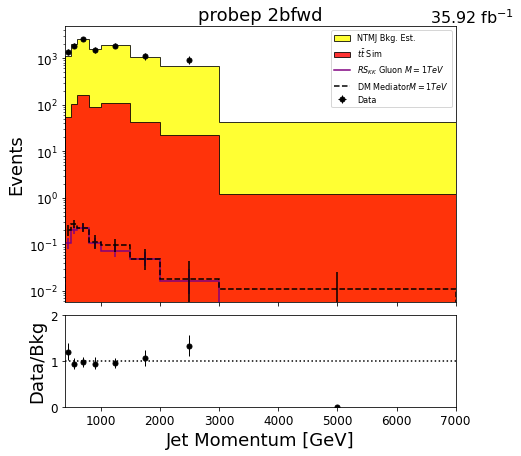

In [20]:
""" ---------- Comparing Background Estimate to Unweighted Data (One Histogram) ---------- """
""" --------------- Background: t tagged probe jet from data weighted by mistag --------------- """
""" --------------- Data: Unweighted Data from the Signal Region (2t tag region) -------------- """

SaveDirectory = maindirectory + '/BkgEstimate/' + btagDir + yearDir + APVDir # split histograms into subdirectories
SaveDirectoryRootFiles = maindirectory + '/BkgEstimate/RootFiles/' + btagDir + yearDir + APVDir # split histograms into subdirectories
DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
DoesDirectoryExist(SaveDirectoryRootFiles)

root_WP   = btagDir[:-1]
root_year = yearDir[:-1]
root_APV  =  APVDir[:-1]
root_Unc  = Unc + TopPt

root_output = uproot3.create(SaveDirectoryRootFiles + 'TTbarRes_0l_' + root_WP + root_year + root_APV + root_Unc + '.root')

#---- list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep'))----#
for name in list_of_hists:
    for b_y in list_of_bcats:
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })
        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(7,7),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True
        )
        fig.subplots_adjust(hspace=.07)

        #---- Print cutflow of events (Debug Purposes Only)----#
        bkg_nevts = JetHT2016_weighted['cutflow']['pret'+b_y] 
        sig_nevts = JetHT2016_unweighted['cutflow']['2t'+b_y]
        # print("Background Estimate Region # of Entries = ~", bkg_nevts*Nevts2016_sf_wgt)
        # print("Signal Region # of Entries =              ~", sig_nevts*Nevts2016_sf)



        #---- Define Histograms from Coffea Outputs ----# 
        # -- For Observed Signal -- #
        Data_hist_unwgt = JetHT2016_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])

        # -- For Mass Modified Background Estimate (Non-Top Multi-Jets; NTMJ)-- #
        Data_hist_modmass_wgt = JetHT2016_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])

        # -- SM TTbar MC in Signal Region (Contributes to the Background) -- #
        TTbar_unwgt = TTbar_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])

        # -- Mistag Weighted TTbar MC (To Remove Double Counting of Untracked t-tagged J1 Events in Bkg.Est) -- #
        TTbar_2016_wgt = TTbar_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- MC Signals -- #
        RSGluon1000_wgt = RSGluon1000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon1000_unwgt_str[12:])
        DM1000_wgt = DM1000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM1000_unwgt_str[12:])

        # =============================================================================================================================== #
        
        # ---- TTbar MC Scaling ---- #
        TTbar_unwgt.scale(ttbar2016_sf*toptag_kf) # Prepare to include this with background estimate
        TTbar_2016_wgt.scale(-ttbar2016_sf*toptag_kf) # Prepare to subtract this from background to correct for ttbar contamination

        # ---- Data Scaling ---- #
        Data_hist_unwgt.scale(Nevts2016_sf) # Observed Signal is only scaled up to Luminosity
        Data_hist_modmass_wgt.scale(Nevts2016_sf_wgt)

        Data_hist_modmass_wgt.add(TTbar_unwgt) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        Data_hist_modmass_wgt.add(TTbar_2016_wgt) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        
        # ---- MC Signals Scaling ---- #
        RSGluon1000_wgt.scale(RSGluon1000_2016_sf_wgt)
        DM1000_wgt.scale(DM1000_2016_sf_wgt)

        # =============================================================================================================================== #

        # ---- Background and Observed Signal for Histograms Compared with MC Signals ---- #

        # -- J0 t-tagged and weighted, J1 Mass Modified, SM ttbar included, J1 t-tagged double counts removed -- #
        Background_ModMass_Corrected = Data_hist_modmass_wgt 

        # -- Simple Observed Data in Signal Region -- #
        Observed = Data_hist_unwgt 

        # ---- Legend Lables ---- #
        legend_labels = {'labels':[r'NTMJ Bkg. Est.', r'$t\bar{t}$ Sim', r'$RS_{KK}$ Gluon $M=1TeV$', r'DM Mediator$ M=1TeV$', r'Data'], 
                         'ncol':1, 
                         'loc': 'upper right',
                         'fontsize': 'xx-small'}

        # ---- Plot Histograms ---- #
        ObservedPlot = hist.plot1d(Observed, ax=ax, clear=True,
                     error_opts=data_err_opts)
        BackgroundPlot = hist.plot1d(Background_ModMass_Corrected, ax=ax, clear=False,
                    fill_opts=stack_background_opts,
                    error_opts=stack_error_opts)
        TTbarPlot = hist.plot1d(TTbar_unwgt, ax=ax, clear=False,
                    fill_opts=stack_ttbar_opts,
                    error_opts=stack_error_opts)
        RSGluon1000Plot = hist.plot1d(RSGluon1000_wgt, ax=ax, clear=False,
                    line_opts=line_rsg1000_opts,
                    error_opts=stack_error_opts)
        DM1000Plot = hist.plot1d(DM1000_wgt, ax=ax, clear=False,
                    line_opts=line_dm1000_opts,
                    error_opts=stack_error_opts,
                    legend_opts=legend_labels)
        
        root_output['Data_' + b_y] = hist.export1d(Observed)
        root_output['BkgEst_' + b_y] = hist.export1d(Background_ModMass_Corrected)
        root_output['TTbar_' + b_y] = hist.export1d(TTbar_unwgt)
        root_output['RSGluon1000_' + b_y] = hist.export1d(RSGluon1000_wgt)
        root_output['DM1000_' + b_y] = hist.export1d(DM1000_wgt)


        plt.ylim(bottom = .1, top = 10**4)

        ax.set_yscale('log')
        ax.autoscale('y')
        ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        ax.set_xlabel(None)
        ax.set_title(name + ' ' + b_y)
        # leg = ax.legend(labels=[r'Data', r'NTMJ', r'$t\bar{t}$ Sim', r'$RS_{KK}$ Gluon $M=1TeV$', r'DM Mediator$M=1TeV$'], bbox_to_anchor=(1., 1.), loc='upper right')

        #---- Plot Ratio ----#
        RatioPlot = hist.plotratio(num = Observed, denom = Background_ModMass_Corrected, ax = rax,
                       error_opts={'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1},
                       unc = 'num')
        rax.set_ylabel('Data/Bkg')
        rax.axhline(y=1, color='k', linestyle=':')
        rax.set_ylim(0,2)
        if 'ttbarmass' in name:
            rax.set_xlim(800,5000)
        elif 'jetpt' in name:
            rax.set_xlim(400,1500)
        elif 'jeteta' in name:
            rax.set_xlim(-2.3,2.3)
        elif 'jetphi' in name:
            rax.set_xlim(-3.14, 3.14)
        elif 'jety' in name:
            rax.set_xlim(-3., 3.)
        elif 'jetdy' in name:
            rax.set_xlim(0., 5.)
        elif 'probept' in name:
            rax.set_xlim(400., 2000.)   
        elif 'probep' in name:
            rax.set_xlim(400., 7000.)  
        
        #rax.set_xlim(0,500)

        #---- Labeling ----#
        Lint = str(Lum2016*.001) # Integrated Luminosity
        lumi = plt.text(1.15, 1.07, Lint[:6] + " fb$^{-1}$",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )

        filename = 'BkgEst_' + name + '_ContaminationCorrection_ModMass' + Unc + TopPt + '_' + b_y + '.png'
        plt.savefig(SaveDirectory+filename, bbox_inches="tight")
        # print('\n' + SaveDirectory + filename)
root_output.close()